## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'CottonDisease/train'
valid_path = 'CottonDisease/test'


In [7]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




234553344/234545216 [==============================] - 300s 1us/step


In [8]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('CottonDisease/train/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [22]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('CottonDisease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [24]:
test_set = test_datagen.flow_from_directory('CottonDisease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 324s 5s/step - loss: 0.5692 - accuracy: 0.9288 - val_loss: 1.8544e-07 - val_accuracy: 1.0000
Epoch 2/20
61/61 [==============================] - 311s 5s/step - loss: 0.5854 - accuracy: 0.9390 - val_loss: 0.0864 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 313s 5s/step - loss: 0.4467 - accuracy: 0.9508 - val_loss: 0.8054 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 314s 5s/step - loss: 0.5409 - accuracy: 0.9487 - val_loss: 5.7946e-06 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 318s 5s/step - loss: 0.3295 - accuracy: 0.9651 - val_loss: 1.3245e-08 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 319s 5s/step - loss: 0.3242 - accuracy: 0.9646 - val_loss: 1.2119e-06 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 314s 5s/step - loss: 0.2523 - accuracy: 0.9708 - val_loss: 6.6227e-09 - val_accuracy: 

In [26]:
import matplotlib.pyplot as plt

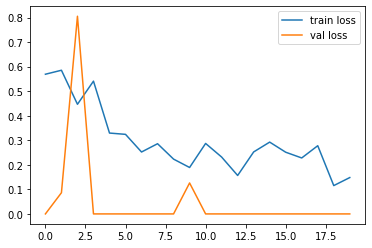

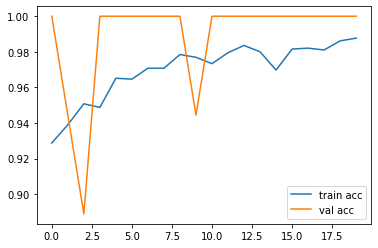

<Figure size 432x288 with 0 Axes>

In [27]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [29]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[5.3846088e-29, 2.2531559e-23, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.1657728e-08, 1.2172376e-20, 1.0000000e+00, 1.5230057e-28],
       [4.8872598e-30, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.3303991e-33, 0.0000000e+00],
       [4.5714924e-16, 8.6781859e-11, 1.3235285e-09, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [5.4839473e-28, 1.0000000e+00, 3.3122518e-22, 6.6293510e-21],
       [1.0000000e+00, 5.0101860e-30, 0.0000000e+00, 0.0000000e+00],
       [7.8975147e-36, 2.7945514e-23, 1.0478895e-18, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.2099686e-36],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [5.2780553e-25, 1.6846226e-15, 1.0000000e+00, 1.5684442e-16],
       [0.0000000e+00, 3.1915728e-

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([2, 3, 1, 2, 0, 3, 2, 3, 3, 2, 1, 0, 3, 1, 0, 1, 2, 1], dtype=int64)

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model=load_model('model_resnet152V2.h5')

In [35]:
img_data

NameError: name 'img_data' is not defined

In [55]:
img=image.load_img('CottonDisease/val/fresh cotton plant/dsd (579)_iaip.jpg',target_size=(224,224))



In [56]:
x=image.img_to_array(img)
x

array([[[ 71.,  87.,  51.],
        [ 85., 107.,  58.],
        [ 73.,  99.,  36.],
        ...,
        [165., 233.,  88.],
        [171., 234.,  81.],
        [171., 234.,  81.]],

       [[ 71.,  96.,  54.],
        [ 84., 114.,  62.],
        [ 97., 131.,  71.],
        ...,
        [165., 234.,  79.],
        [171., 234.,  81.],
        [171., 234.,  81.]],

       [[ 79., 129.,  34.],
        [109., 161.,  63.],
        [ 97., 144.,  50.],
        ...,
        [167., 235.,  70.],
        [171., 234.,  81.],
        [171., 234.,  81.]],

       ...,

       [[ 80.,  78.,  40.],
        [ 89.,  87.,  49.],
        [ 83.,  81.,  43.],
        ...,
        [175., 226.,  99.],
        [162., 224.,  87.],
        [167., 229.,  92.]],

       [[ 79.,  77.,  39.],
        [ 79.,  77.,  39.],
        [ 83.,  81.,  43.],
        ...,
        [177., 233., 100.],
        [148., 217.,  75.],
        [161., 230.,  88.]],

       [[ 77.,  75.,  37.],
        [ 83.,  81.,  43.],
        [ 80.,  

In [57]:
x.shape

(224, 224, 3)

In [58]:
x=x/255

In [59]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

array([[9.6983159e-01, 1.9279389e-11, 1.3827269e-04, 3.0030165e-02]],
      dtype=float32)

In [61]:
a=np.argmax(model.predict(img_data), axis=1)

In [63]:
a==1

array([False])

In [44]:
import tensorflow as tf

In [45]:
tf.__version__

'2.2.0'